# 3️⃣ Customer Behaviour & RFM Analysis
The main business problem is the **lack of visibility into customer value and behaviour**. The company does not yet understand which customers contribute the most to revenue, how customer value is distributed, or which customers still have potential for value development.
Without this understanding, retention strategies, loyalty programs, and marketing resource allocation risk being off-target.

To address this issue, this analysis utilises **Customer Behaviour Analysis** and **RFM Analysis (Recency, Frequency, Monetary)**. Customer Behaviour Analysis is used to understand overall transaction patterns and revenue contribution, while RFM Analysis is used as a structured approach to segment customers based on their value and activity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/data_cleaning/EDA_dataset.csv')
df.head()

,SalesID,CustomerID,Name,Price,Quantity,Discount,Revenue,Product,Category,Class,VitalityDays,SalesDate,City,Country
0,1,27039,Susan,44.2337,7,0.0,309.63590,Vaccum Bag 10x13,Confections,High,41.0,2018-02-05 07:38:25.430,Albuquerque,United States
1,2,25011,Telly,62.5460,7,0.0,437.82200,Sardines,Grain,Low,90.0,2018-02-02 16:03:31.150,Phoenix,United States
2,3,94024,Jon,79.0184,24,0.0,1896.44160,Crab - Imitation Flakes,Produce,Medium,0.0,2018-05-03 19:31:56.880,Buffalo,United States
3,4,73966,Carol,81.3167,19,0.2,1236.01384,Smirnoff Green Apple Twist,Seafood,High,90.0,2018-04-07 14:43:55.420,Dallas,United States
4,5,32653,Terra,79.9780,9,0.0,719.80200,Coffee - Dark Roast,Poultry,Low,0.0,2018-02-12 15:37:03.940,Charlotte,United States


In [ ]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

## Informasi Dataset

In [ ]:
# 1. Info Dasar
print("\n--- Informasi Dataset ---")
print(f"Jumlah Baris & Kolom: {df.shape}")
print(f"Jumlah Pelanggan Unik: {df['CustomerID'].nunique()}")
print(f"Rentang Tanggal: {df['SalesDate'].min().date()} sampai {df['SalesDate'].max().date()}")
print(f"Total Penjualan: ${df['Revenue'].sum():,.2f}")


--- Informasi Dataset ---
Jumlah Baris & Kolom: (6758125, 14)
Jumlah Pelanggan Unik: 98759
Rentang Tanggal: 2018-01-01 sampai 2018-05-09
Total Penjualan: $4,332,445,646.06


## Recency, Frequency and Monetary

In [ ]:
reference_date = df['SalesDate'].max() + dt.timedelta(days=1)
print(f"\nTanggal Referensi Analisis: {reference_date.date()} ")

rfm = df.groupby('CustomerID').agg({
    'SalesDate': lambda x: (reference_date - x.max()).days,
    'SalesID': 'nunique',
    'Revenue': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())


Tanggal Referensi Analisis: 2018-05-10 
   CustomerID  Recency  Frequency    Monetary
0           1        4         65  3263.56073
1           2        6         64  3397.89219
2           3        1         71  3327.79072
3           4        2         69  3122.56073
4           5        1         59  2650.34531


In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,98759.000000,98759.000000,98759.000000,98759.000000
mean,49380.000000,2.448486,68.430472,43868.869126
std,28509.411955,1.886112,8.249694,25307.342799
min,1.000000,1.000000,36.000000,1971.233780
25%,24690.500000,1.000000,63.000000,22299.176025
50%,49380.000000,2.000000,68.000000,42970.178550
75%,74069.500000,3.000000,74.000000,63836.515330
max,98759.000000,22.000000,103.000000,130324.158960


In [ ]:
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)


rfm['R_score'] = pd.qcut(rfm['Recency'].rank(method='first'), q=5, labels=r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

def assign_segment(row):
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 4 and f >= 4 and m >= 4:
      return "Champions"

    elif f >= 4 and m >= 3:
      return "Loyal Customers"

    elif m >= 4 and f <= 3:
      return "Big Spenders"

    elif r >= 4 and f <= 2:
      return "New / Promising"

    elif r <= 2 and f >= 3 and m >= 3:
        return "At Risk"

    elif r <= 2 and f <= 2 and m <= 2:
        return "Hibernating"
    elif r == 3 and f == 3:
        return "Need Attention"
    else:
        return "Others"

rfm['Segment_RFM'] = rfm.apply(assign_segment, axis=1)

print("--- Hasil Segmentasi ---")
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment_RFM']].head())

--- Hasil Segmentasi ---
   CustomerID  Recency  Frequency    Monetary RFM_Score      Segment_RFM
0           1        4         65  3263.56073       221      Hibernating
1           2        6         64  3397.89219       121      Hibernating
2           3        1         71  3327.79072       541           Others
3           4        2         69  3122.56073       331   Need Attention
4           5        1         59  2650.34531       511  New / Promising


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment_RFM
0,1,4,65,3263.56073,2,2,1,221,Hibernating
1,2,6,64,3397.89219,1,2,1,121,Hibernating
2,3,1,71,3327.79072,5,4,1,541,Others
3,4,2,69,3122.56073,3,3,1,331,Need Attention
4,5,1,59,2650.34531,5,1,1,511,New / Promising


In [ ]:
rfm['Segment_RFM'].value_counts()

,count
Segment_RFM,
Others,30738
Big Spenders,20522
Loyal Customers,17880
New / Promising,10244
Champions,8070
Hibernating,7344
Need Attention,2704
At Risk,1257


In [ ]:
# Get unique City and Country for each CustomerID from the original dataframe
customer_geo = df.groupby('CustomerID').agg({
    'City': 'first',
    'Country': 'first'
}).reset_index()

# Merge this geographic data into the rfm dataframe
rfm = pd.merge(rfm, customer_geo, on='CustomerID', how='left')

print("--- RFM Table with City and Country Added ---")
print(rfm.head())

--- RFM Table with City and Country Added ---
   CustomerID  Recency  Frequency    Monetary R_score F_score M_score  \
0           1        4         65  3263.56073       2       2       1   
1           2        6         64  3397.89219       1       2       1   
2           3        1         71  3327.79072       5       4       1   
3           4        2         69  3122.56073       3       3       1   
4           5        1         59  2650.34531       5       1       1   

  RFM_Score      Segment_RFM        City        Country  
0       221      Hibernating    Oklahoma  United States  
1       121      Hibernating  Pittsburgh  United States  
2       541           Others     Houston  United States  
3       331   Need Attention   Cleveland  United States  
4       511  New / Promising     Buffalo  United States  


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment_RFM,City,Country
0,1,4,65,3263.56073,2,2,1,221,Hibernating,Oklahoma,United States
1,2,6,64,3397.89219,1,2,1,121,Hibernating,Pittsburgh,United States
2,3,1,71,3327.79072,5,4,1,541,Others,Houston,United States
3,4,2,69,3122.56073,3,3,1,331,Need Attention,Cleveland,United States
4,5,1,59,2650.34531,5,1,1,511,New / Promising,Buffalo,United States


In [ ]:
# pilih kolom minimal dari RFM
rfm_segment = rfm[['CustomerID', 'Segment_RFM']]

# merge ke data transaksi
df_rfm_txn = df.merge(
    rfm_segment,
    on='CustomerID',
    how='left'
)

df_rfm_txn.head()

,SalesID,CustomerID,Name,Price,Quantity,Discount,Revenue,Product,Category,Class,VitalityDays,SalesDate,City,Country,Segment_RFM
0,1,27039,Susan,44.2337,7,0.0,309.63590,Vaccum Bag 10x13,Confections,High,41.0,2018-02-05 07:38:25.430,Albuquerque,United States,Hibernating
1,2,25011,Telly,62.5460,7,0.0,437.82200,Sardines,Grain,Low,90.0,2018-02-02 16:03:31.150,Phoenix,United States,Others
2,3,94024,Jon,79.0184,24,0.0,1896.44160,Crab - Imitation Flakes,Produce,Medium,0.0,2018-05-03 19:31:56.880,Buffalo,United States,Big Spenders
3,4,73966,Carol,81.3167,19,0.2,1236.01384,Smirnoff Green Apple Twist,Seafood,High,90.0,2018-04-07 14:43:55.420,Dallas,United States,Loyal Customers
4,5,32653,Terra,79.9780,9,0.0,719.80200,Coffee - Dark Roast,Poultry,Low,0.0,2018-02-12 15:37:03.940,Charlotte,United States,Others


In [ ]:
segment_category_rev = (
    df_rfm_txn
    .groupby(['Segment_RFM', 'Category'])['Revenue']
    .sum()
    .reset_index()
)

segment_category_rev['Category_Ratio'] = (
    segment_category_rev
    .groupby('Segment_RFM')['Revenue']
    .transform(lambda x: x / x.sum())
)

segment_category_rev.sort_values(
    ['Segment_RFM', 'Category_Ratio'],
    ascending=False
).head(10)


,Segment_RFM,Category,Revenue,Category_Ratio
79,Others,Confections,9.544755e+07,0.128757
82,Others,Meat,8.431257e+07,0.113736
83,Others,Poultry,7.535899e+07,0.101658
78,Others,Cereals,7.324458e+07,0.098806
87,Others,Snails,6.377946e+07,0.086037
84,Others,Produce,6.306888e+07,0.085079
77,Others,Beverages,6.282543e+07,0.084750
80,Others,Dairy,6.065956e+07,0.081829
85,Others,Seafood,5.639063e+07,0.076070
81,Others,Grain,5.487113e+07,0.074020


In [ ]:
top_category_segment = (
    segment_category_rev
    .sort_values(['Segment_RFM', 'Category_Ratio'], ascending=False)
    .groupby('Segment_RFM')
    .head(1)
)

top_category_segment

,Segment_RFM,Category,Revenue,Category_Ratio
79,Others,Confections,9.544755e+07,0.128757
68,New / Promising,Confections,3.466267e+07,0.128788
57,Need Attention,Confections,9.230360e+06,0.129393
46,Loyal Customers,Confections,1.433972e+08,0.128401
35,Hibernating,Confections,1.703684e+07,0.128786
24,Champions,Confections,7.645129e+07,0.128544
13,Big Spenders,Confections,1.738639e+08,0.128545
2,At Risk,Confections,6.840888e+06,0.126018


In [ ]:
customer_category_count = (
    df_rfm_txn
    .groupby('CustomerID')['Category']
    .nunique()
    .reset_index(name='Category_Count')
)

rfm_enriched = rfm.merge(
    customer_category_count,
    on='CustomerID',
    how='left'
)

rfm_enriched.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment_RFM,City,Country,Category_Count
0,1,4,65,3263.56073,2,2,1,221,Hibernating,Oklahoma,United States,11
1,2,6,64,3397.89219,1,2,1,121,Hibernating,Pittsburgh,United States,11
2,3,1,71,3327.79072,5,4,1,541,Others,Houston,United States,11
3,4,2,69,3122.56073,3,3,1,331,Need Attention,Cleveland,United States,11
4,5,1,59,2650.34531,5,1,1,511,New / Promising,Buffalo,United States,11


In [ ]:
segment_category_diversity = (
    rfm_enriched
    .groupby('Segment_RFM')['Category_Count']
    .mean()
    .reset_index()
)

segment_category_diversity

,Segment_RFM,Category_Count
0,At Risk,10.973747
1,Big Spenders,10.952831
2,Champions,10.984511
3,Hibernating,10.930964
4,Loyal Customers,10.980817
5,Need Attention,10.970784
6,New / Promising,10.939672
7,Others,10.961936


In [ ]:
cust_cat_rev = (
    df_rfm_txn
    .groupby(['CustomerID', 'Category'])['Revenue']
    .sum()
    .reset_index()
)

cust_cat_rev['Total_Revenue'] = cust_cat_rev.groupby(
    'CustomerID')['Revenue'].transform('sum')

cust_cat_rev['Category_Ratio'] = (
    cust_cat_rev['Revenue'] / cust_cat_rev['Total_Revenue']
)

top_category_customer = (
    cust_cat_rev
    .sort_values(['CustomerID', 'Category_Ratio'], ascending=False)
    .groupby('CustomerID')
    .head(1)
    .rename(columns={
        'Category': 'Top_Category',
        'Category_Ratio': 'Top_Category_Ratio'
    })
)

In [ ]:
rfm_final_profile = rfm_enriched.merge(
    top_category_customer[['CustomerID', 'Top_Category', 'Top_Category_Ratio']],
    on='CustomerID',
    how='left'
)
rfm_final_profile.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment_RFM,City,Country,Category_Count,Top_Category,Top_Category_Ratio
0,1,4,65,3263.56073,2,2,1,221,Hibernating,Oklahoma,United States,11,Grain,0.162168
1,2,6,64,3397.89219,1,2,1,121,Hibernating,Pittsburgh,United States,11,Confections,0.224589
2,3,1,71,3327.79072,5,4,1,541,Others,Houston,United States,11,Beverages,0.147869
3,4,2,69,3122.56073,3,3,1,331,Need Attention,Cleveland,United States,11,Meat,0.173426
4,5,1,59,2650.34531,5,1,1,511,New / Promising,Buffalo,United States,11,Cereals,0.266080


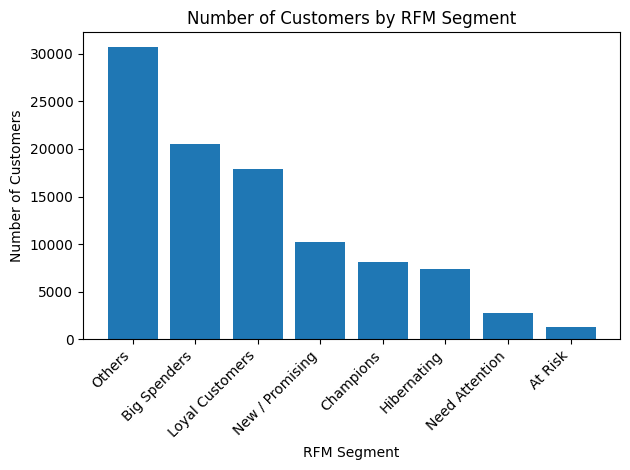

In [ ]:
import matplotlib.pyplot as plt

# ringkasan segment
segment_summary = (
    rfm_final_profile
    .groupby('Segment_RFM')
    .agg(
        customer_count=('CustomerID', 'count'),
        total_revenue=('Monetary', 'sum')
    )
    .reset_index()
)

# sort biar rapi
segment_summary = segment_summary.sort_values('customer_count', ascending=False)

plt.figure()
plt.bar(segment_summary['Segment_RFM'], segment_summary['customer_count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by RFM Segment')
plt.tight_layout()
plt.show()


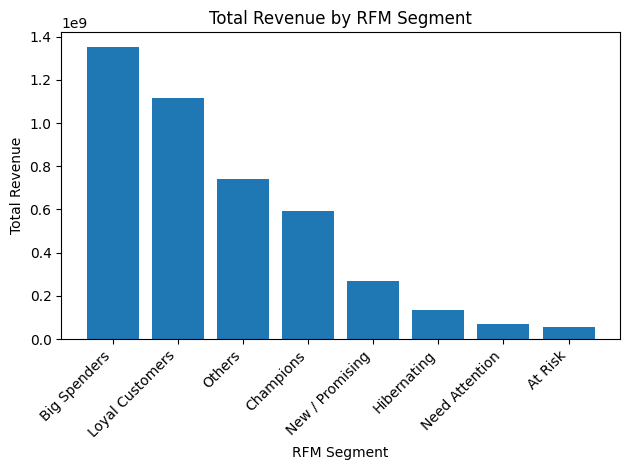

In [ ]:
segment_summary_rev = segment_summary.sort_values('total_revenue', ascending=False)

plt.figure()
plt.bar(segment_summary_rev['Segment_RFM'], segment_summary_rev['total_revenue'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('RFM Segment')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by RFM Segment')
plt.tight_layout()
plt.show()


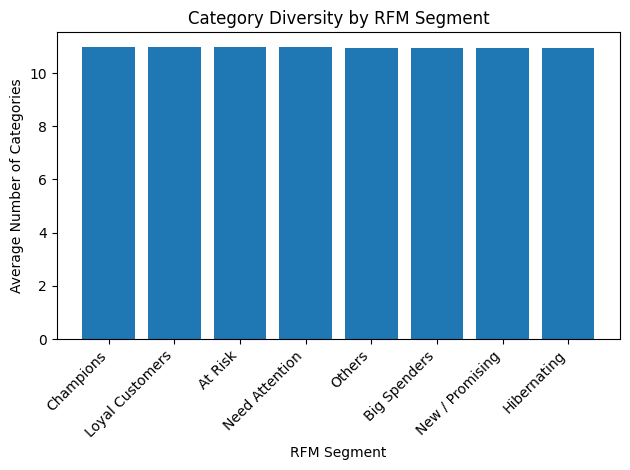

In [ ]:
segment_diversity = (
    rfm_final_profile
    .groupby('Segment_RFM')['Category_Count']
    .mean()
    .reset_index()
    .sort_values('Category_Count', ascending=False)
)

plt.figure()
plt.bar(segment_diversity['Segment_RFM'], segment_diversity['Category_Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('RFM Segment')
plt.ylabel('Average Number of Categories')
plt.title('Category Diversity by RFM Segment')
plt.tight_layout()
plt.show()


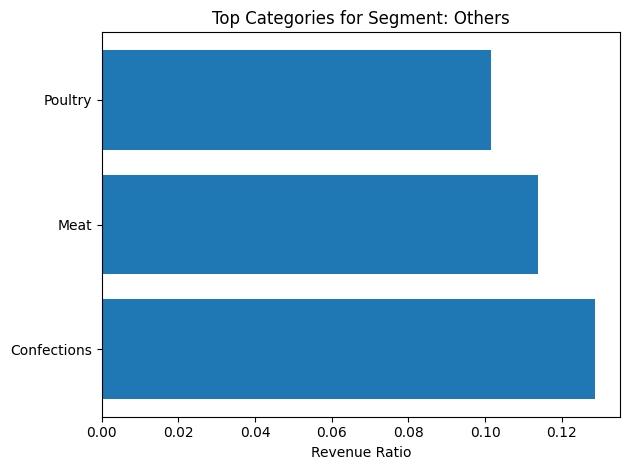

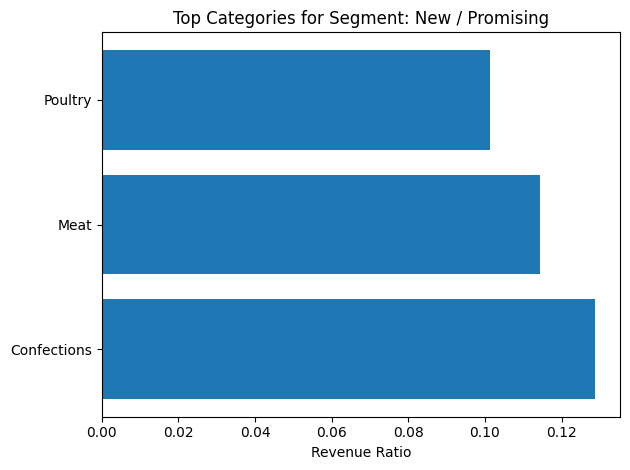

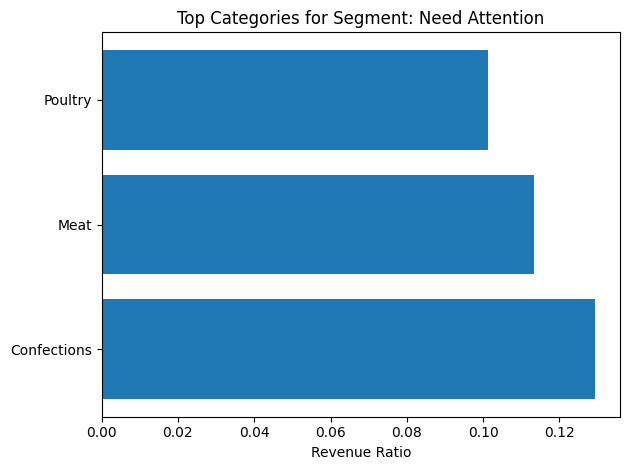

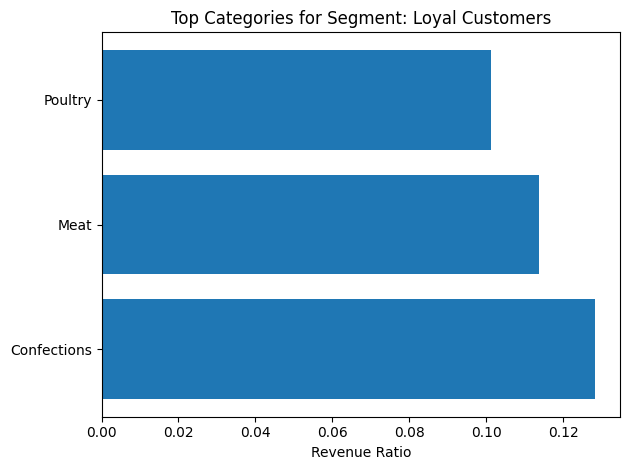

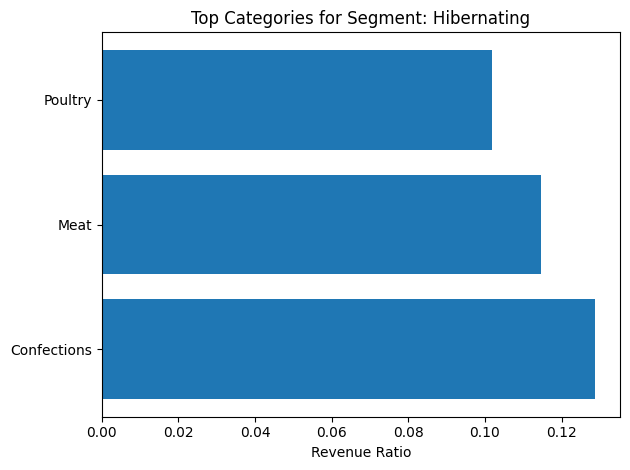

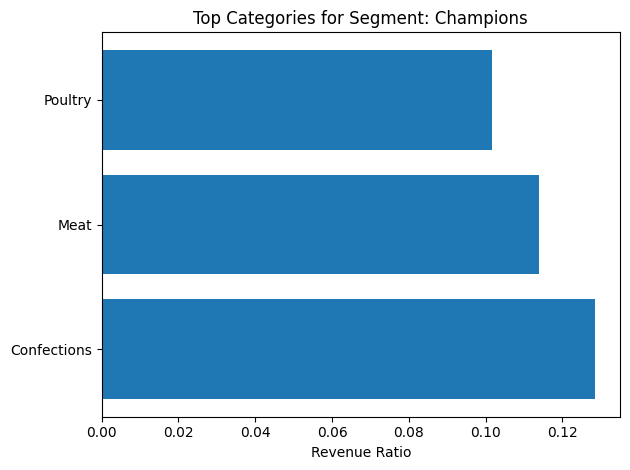

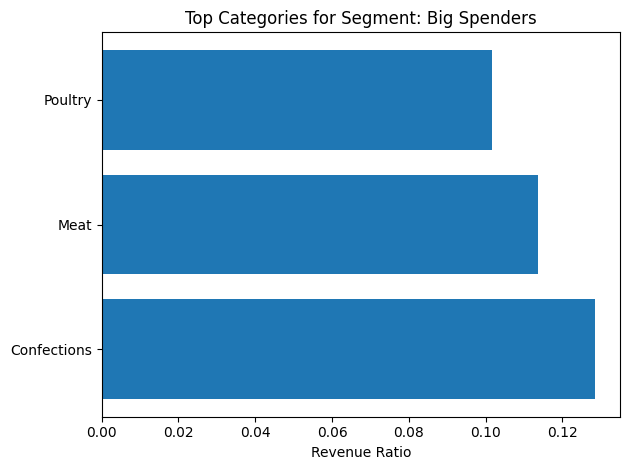

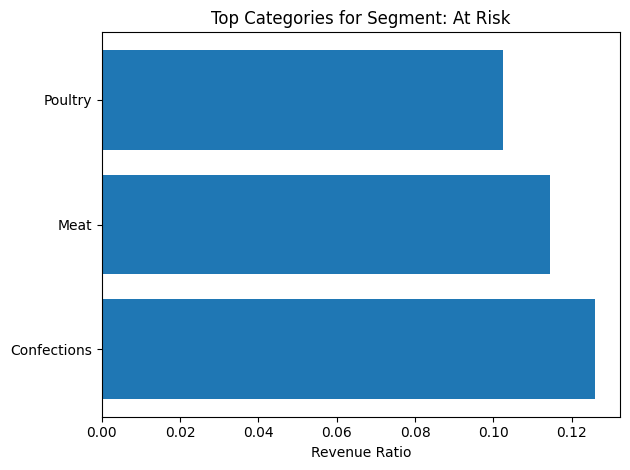

In [ ]:
# revenue per segment x category
segment_category = (
    df_rfm_txn
    .groupby(['Segment_RFM', 'Category'])['Revenue']
    .sum()
    .reset_index()
)

# proporsi revenue
segment_category['ratio'] = (
    segment_category
    .groupby('Segment_RFM')['Revenue']
    .transform(lambda x: x / x.sum())
)

# ambil top 3 kategori per segment
top3_category_segment = (
    segment_category
    .sort_values(['Segment_RFM', 'ratio'], ascending=False)
    .groupby('Segment_RFM')
    .head(3)
)

# plot per segment (loop sederhana)
for segment in top3_category_segment['Segment_RFM'].unique():
    data_seg = top3_category_segment[
        top3_category_segment['Segment_RFM'] == segment
    ]

    plt.figure()
    plt.barh(data_seg['Category'], data_seg['ratio'])
    plt.xlabel('Revenue Ratio')
    plt.title(f'Top Categories for Segment: {segment}')
    plt.tight_layout()
    plt.show()


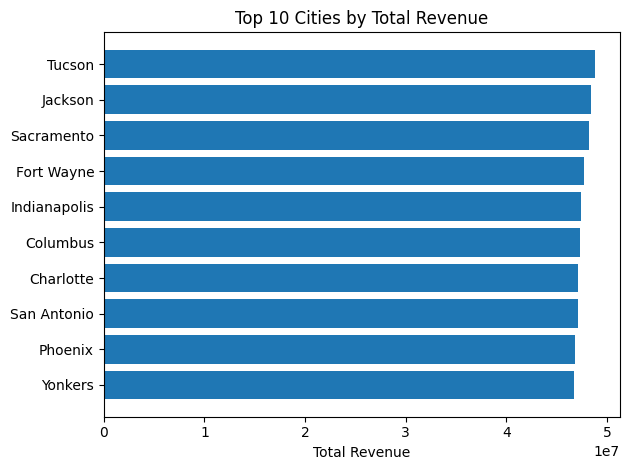

In [ ]:
import matplotlib.pyplot as plt

city_revenue = (
    rfm_final_profile
    .groupby('City')['Monetary']
    .sum()
    .reset_index()
    .sort_values('Monetary', ascending=False)
    .head(10)
)

plt.figure()
plt.barh(city_revenue['City'], city_revenue['Monetary'])
plt.xlabel('Total Revenue')
plt.title('Top 10 Cities by Total Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


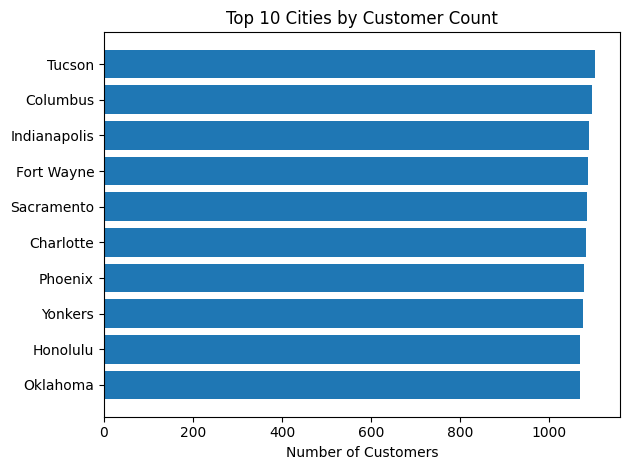

In [ ]:
city_customer = (
    rfm_final_profile
    .groupby('City')['CustomerID']
    .count()
    .reset_index(name='Customer Count')
    .sort_values('Customer Count', ascending=False)
    .head(10)
)

plt.figure()
plt.barh(city_customer['City'], city_customer['Customer Count'])
plt.xlabel('Number of Customers')
plt.title('Top 10 Cities by Customer Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


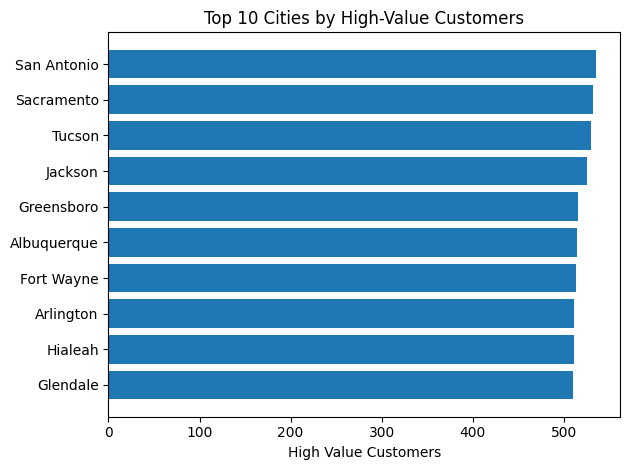

In [ ]:
high_value_segments = ['Champions', 'Big Spenders', 'Loyal Customers']

city_high_value = (
    rfm_final_profile
    [rfm_final_profile['Segment_RFM'].isin(high_value_segments)]
    .groupby('City')['CustomerID']
    .count()
    .reset_index(name='High Value Customers')
    .sort_values('High Value Customers', ascending=False)
    .head(10)
)

plt.figure()
plt.barh(city_high_value['City'], city_high_value['High Value Customers'])
plt.xlabel('High Value Customers')
plt.title('Top 10 Cities by High-Value Customers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


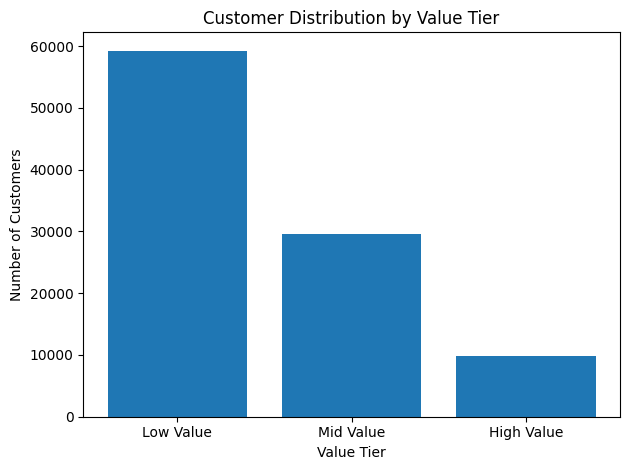

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rfm_final_profile['Overall_Value'] = pd.cut(
    rfm_final_profile['Monetary'],
    bins=[
        rfm_final_profile['Monetary'].min(),
        rfm_final_profile['Monetary'].quantile(0.6),
        rfm_final_profile['Monetary'].quantile(0.9),
        rfm_final_profile['Monetary'].max()
    ],
    labels=['Low Value', 'Mid Value', 'High Value'],
    include_lowest=True
)

value_dist = (
    rfm_final_profile['Overall_Value']
    .value_counts()
    .reset_index()
)

# Correcting column names for plotting
plt.figure()
plt.bar(value_dist['Overall_Value'], value_dist['count'])
plt.xlabel('Value Tier')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Value Tier')
plt.tight_layout()
plt.show()

In [ ]:
df.nunique()

,0
SalesID,6758125
CustomerID,98759
Name,969
Price,452
Quantity,25
Discount,3
Revenue,30715
Product,452
Category,11
Class,3


In [ ]:
rfm_final_profile.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment_RFM,City,Country,Category_Count,Top_Category,Top_Category_Ratio,Overall_Value
0,1,4,65,3263.56073,2,2,1,221,Hibernating,Oklahoma,United States,11,Grain,0.162168,Low Value
1,2,6,64,3397.89219,1,2,1,121,Hibernating,Pittsburgh,United States,11,Confections,0.224589,Low Value
2,3,1,71,3327.79072,5,4,1,541,Others,Houston,United States,11,Beverages,0.147869,Low Value
3,4,2,69,3122.56073,3,3,1,331,Need Attention,Cleveland,United States,11,Meat,0.173426,Low Value
4,5,1,59,2650.34531,5,1,1,511,New / Promising,Buffalo,United States,11,Cereals,0.266080,Low Value


In [ ]:
# rfm_final_profile.to_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/data_cleaning/rfm_final_profile.csv', index=False)